<a href="https://colab.research.google.com/github/wereign/aera-vera-keras-nathu-geras/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
#Start by connecting gdrive into the google colab

from google.colab import drive
drive.mount('/content/gdrive')
DRIVE_PATH = "/content/gdrive/MyDrive/Colab Notebooks/TF_2_Notebooks_and_Data/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [103]:
#MNIST dataset is already built into keras
from tensorflow.keras.datasets import mnist

In [104]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [105]:
x_train.shape

(60000, 28, 28)

In [106]:
single_image = x_train[0]

In [107]:
single_image.shape

(28, 28)

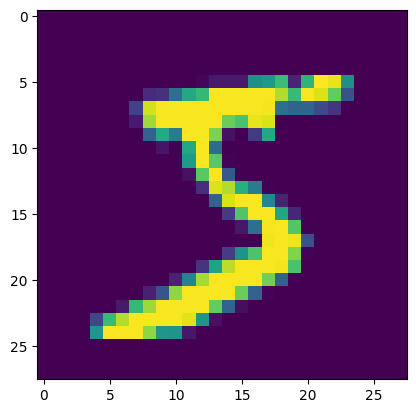

In [108]:
plt.imshow(single_image)

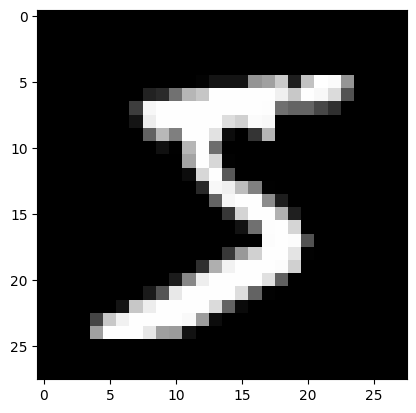

In [109]:
# Image is in purple due to a default color mapping called "viridis"
plt.imshow(single_image,cmap='Greys_r' )

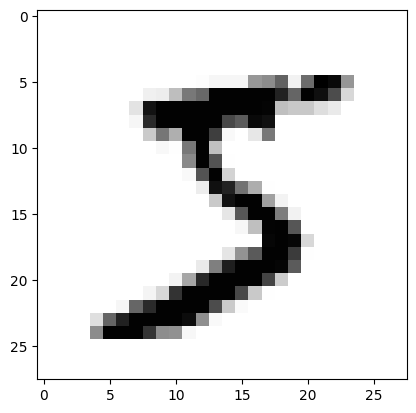

In [110]:
plt.imshow(single_image,cmap='Greys')

In [111]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [112]:
from tensorflow.keras.utils import to_categorical

In [113]:
y_train.shape

(60000,)

In [114]:
y_example = to_categorical(y_train)
y_cat_train = to_categorical(y_train)

In [115]:
y_example[0][5]

1.0

In [116]:
y_cat_test = to_categorical(y_test)

In [117]:
# We can safely assume that all images will remain between 255 and 0

x_train = x_train/255
x_test = x_test/255

In [118]:
scaled_single_image = x_train[0]

In [119]:
scaled_single_image.max()

1.0

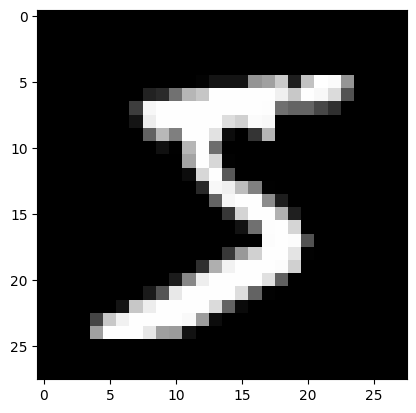

In [120]:
plt.imshow(scaled_single_image,cmap='Greys_r')

In [121]:
x_train = x_train.reshape(60000,28,28,1)

In [122]:
x_test = x_test.reshape(10000,28,28,1)

# Model Building

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [124]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),padding='valid',input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#flattening the images
model.add(Flatten())
model.add(Dense(128,activation='relu'))

#OUTPUT Layer --> Softmax
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [125]:
from tensorflow.keras.callbacks import EarlyStopping

In [126]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [127]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1381 - accuracy: 0.9589 - val_loss: 0.0575 - val_accuracy: 0.9808
Epoch 2/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0458 - accuracy: 0.9861 - val_loss: 0.0430 - val_accuracy: 0.9853
Epoch 3/10
1875/1875 [==============================] - 70s 38ms/step - loss: 0.0308 - accuracy: 0.9905 - val_loss: 0.0416 - val_accuracy: 0.9869
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0208 - accuracy: 0.9930 - val_loss: 0.0427 - val_accuracy: 0.9872


In [128]:
model.save('mnist_keras.h5')

In [129]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

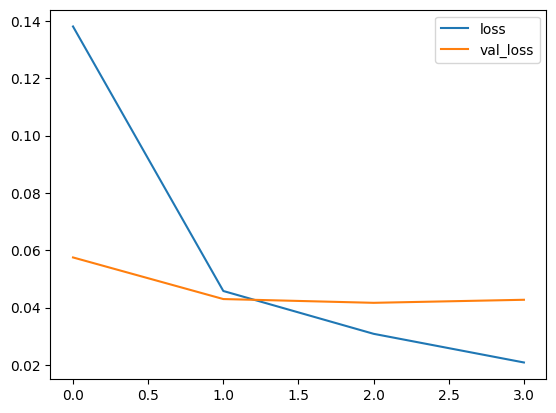

In [130]:
metrics[['loss','val_loss']].plot()

<Axes: >

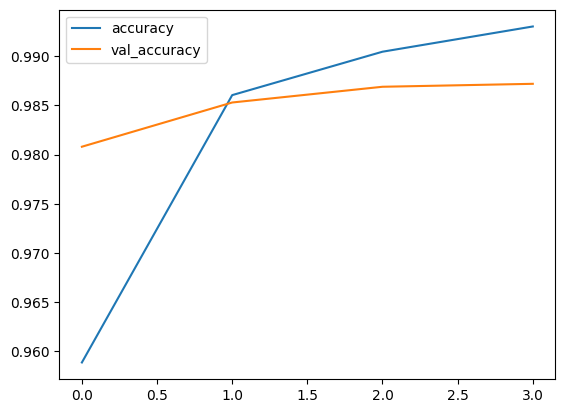

In [131]:
metrics[['accuracy','val_accuracy']].plot()

In [133]:
model.metrics_names

['loss', 'accuracy']

In [134]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.0427054762840271, 0.9872000217437744]

In [135]:
from sklearn.metrics import classification_report, confusion_matrix

In [138]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 3s 9ms/step


In [139]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      1.00      0.98      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.96      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [140]:
confusion_matrix(y_test,classes_x)

array([[ 976,    0,    0,    1,    0,    0,    1,    0,    2,    0],
       [   0, 1130,    3,    0,    0,    0,    1,    0,    1,    0],
       [   1,    0, 1027,    1,    0,    0,    0,    1,    2,    0],
       [   0,    0,    3,  999,    0,    5,    0,    0,    3,    0],
       [   0,    0,    0,    0,  967,    0,    6,    0,    1,    8],
       [   2,    0,    0,    6,    0,  882,    1,    0,    1,    0],
       [   2,    3,    0,    1,    1,    5,  945,    0,    1,    0],
       [   0,    2,   20,    1,    0,    0,    0,  991,    3,   11],
       [   5,    0,    3,    0,    0,    0,    1,    0,  964,    1],
       [   1,    2,    0,    3,    3,    3,    0,    1,    5,  991]])

<Axes: >

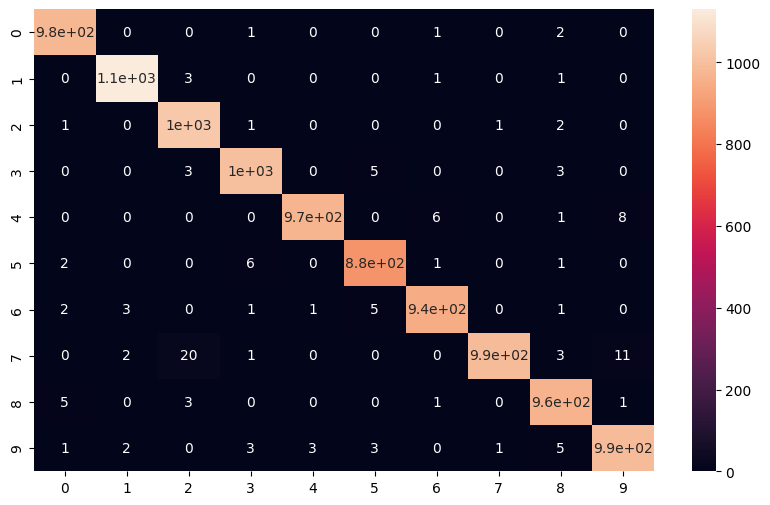

In [142]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,classes_x),annot=True)

In [143]:
my_number = x_test[0]


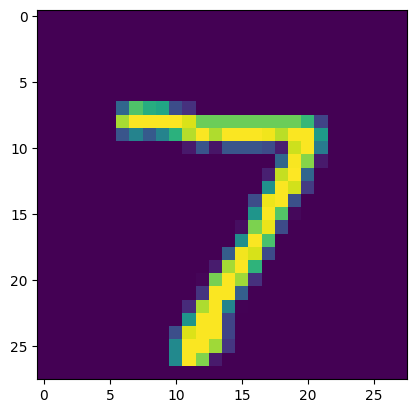

In [144]:
plt.imshow(my_number.reshape(28,28))

In [145]:
predict_one_image=model.predict(my_number.reshape(1,28,28,1)) 
classes_one_image =np.argmax(predict_one_image,axis=1)

1/1 [==============================] - 0s 24ms/step


In [147]:
print(classes_one_image)

[7]
